linear regression coefficient of determination: 0.7682189959617021


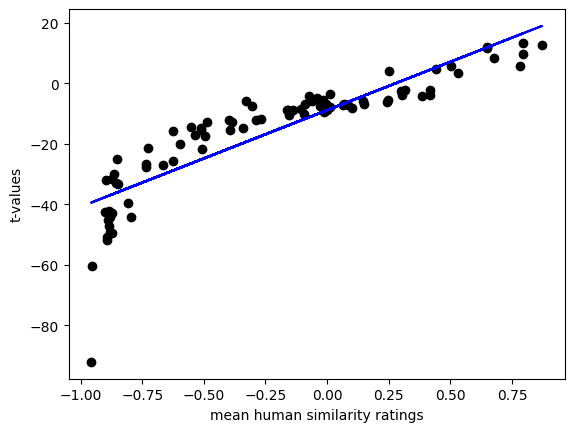

correlation between embedding scores and human ratings: r=0.15, p=0.16


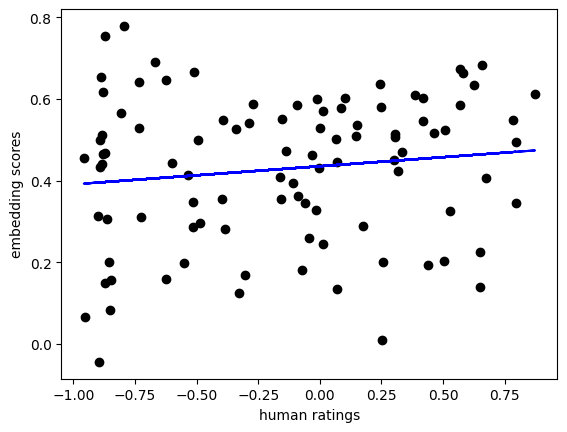

('huge', 'dumb'): coord(-0.95, 0.066), sim=-0.95, assoc=0
('dollar', 'people'): coord(-0.9, -0.044), sim=-0.9, assoc=0
('recent', 'new'): coord(0.5, 0.2), sim=0.5, assoc=0.13
('milk', 'juice'): coord(-0.79, 0.78), sim=-0.79, assoc=0.14
('come', 'bring'): coord(-0.51, 0.67), sim=-0.51, assoc=0.21
('crowd', 'bunch'): coord(0.068, 0.13), sim=0.068, assoc=0.3
('game', 'fun'): coord(-0.3, 0.17), sim=-0.3, assoc=0.47
('think', 'decide'): coord(-0.073, 0.18), sim=-0.073, assoc=0.88
('old', 'fresh'): coord(-0.85, 0.082), sim=-0.85, assoc=0.91
('easy', 'difficult'): coord(-0.87, 0.75), sim=-0.87, assoc=2.8
('short', 'long'): coord(-0.89, 0.66), sim=-0.89, assoc=5.4
('leg', 'arm'): coord(-0.67, 0.69), sim=-0.67, assoc=6.7


In [10]:
import csv
import re
from collections import defaultdict
from gensim.models import Word2Vec

sgtb_emb = Word2Vec.load('../embeddings/sgtb_word2vec_no_lemmatize.embedding')
coca_emb = Word2Vec.load('../embeddings/coca_word2vec_no_lemmatize.embedding')
humanScores = {}

# lists of word pairs
simLexPairsFull = []

simLexPairs = [
    ['formal','proper'], ['huge','dumb'], ['composer','writer'],
    ['carry','bring'], ['breathe','choke'], ['create','build'],
    ['situation','condition'], ['hard','simple'], ['absence','presence'],
    
    ['couple','pair'], ['aggression','hostility'], ['navy','army'],
    ['abundance','plenty'], ['old','new'], ['army','squad'],
    ['contemplate','think'], ['recent','new'], ['say','participate'],
    
    ['hard','difficult'], ['reality','illusion'], ['bring','restore'],
    ['inexpensive','cheap'], ['chemistry','theory'], ['sly','strange'],
    ['day','morning'], ['endurance','band'], ['word','dictionary'],
    
    ['unhappy','mad'], ['large','big'], ['kill','choke'],
    ['chicken','steak'], ['apple','sunshine'], ['danger','disease'],
    ['go','sell'], ['communicate','pray'], ['cab','bus'],
    
    ['nice','generous'], ['greet','meet'], ['dirty','narrow'],
    ['container','mouse'], ['leg','arm'], ['bean','coffee'],
    ['comfort','safety'], ['milk','juice'], ['friend','buddy'],
    
    ['creator','maker'], ['science','psychology'], ['dumb','intelligent'],
    ['corporation','business'], ['great','awful'], ['weird','normal'],
    ['sharp','dull'], ['overcome','dominate'], ['book','text'],
    
    ['modest','flexible'], ['mouth','tooth'], ['joy','pride'],
    ['easy','difficult'], ['leader','manager'], ['rhythm','melody'],
    ['receive','give'], ['marijuana','herb'], ['absorb','possess'],
    
    ['short','long'], ['simple','easy'], ['rat','mouse'],
    ['think','decide'], ['dollar','people'], ['friend','guest'],
    ['accept','believe'], ['game','fun'], ['boundary','border'],
    
    ['tobacco','cigarette'], ['street','alley'], ['belief','impression'],
    ['crowd','bunch'], ['kill','hang'], ['victory','triumph'],
    ['cloud','storm'], ['lawyer','banker'], ['old','fresh'],

    ['god','spirit'], ['guilty','ashamed'], ['explain','prove'],
    ['listen','hear'], ['make','earn'], ['accept','acknowledge'],
    ['big','heavy'], ['violent','angry'], ['come','bring'],

    ['forget','learn'], ['achieve','accomplish'], ['winter','season'],
    ['happy','young'], ['attention','awareness'], ['woman','wife'],
    ['protect','defend'], ['inform','notify'], ['cherish','keep'],
    ['leave','enter']
]

singlishPairs = [
    ['can','okay'], ['blur','ignorant'],
    ['pattern','behavior'], ['mug','study'],
    ['chop','reserve'], ['hawker','peddler'],
    ['rubber','eraser'], ['biscuit','cookie'],
    ['vest','singlet'], ['keep','always'],
    ['letter','character'], ['lift','elevator'],
    ['bill','cheque'], ['chips','fries'],
    ['trolley','cart'], ['dummy','mannequin'],
    ['flat','apartment'], ['boot','expel'],
    ['rocket','vegetable'], ['takeaway','pack'],
    ['football','rugby']
]

singlishPairsWikipedia = [
    ['basket','bastard'], ['chop','reserve'], ['damn','very'],
    ['diam','quiet'], ['get','cheeky'], ['handphone','mobile'],
    ['mug','study'], ['orbit','old-fashioned'], ['photostat','photocopy'],
    ['pon','truant'], ['sod','mental'], ['solid','good'],
    ['song','nice'], ['toot','stupid'], ['un','understand'],
    ['arrow','delegate'], ['auntie','adult'], ['banana','western'],
    ['blur','clueless'], ['can','okay'], ['confirm','sure'],
    ['earpiece','headphone'], ['follow','understand'], ['got','have'],
    ['jam','congestion'], ['lightbulb','third-wheel'], ['never','yet'],
    ['one','de'], ['on','settled'], ['open','on'],
    ['power','good'], ['revert','reply'], ['send','drive'],
    ['solid','excellent'], ['steady','excellent'], ['spoil','broken'],
    ['stay','live'], ['step','act'], ['steady','attached'],
    ['steady','agree'], ['steady','capable'], ['stone','daydream'],
    ['take','eat'], ['uncle','adult'], ['until','extent']
]

def loadHumanScores(fileName, humanScores):
    with open(fileName, 'r') as f:
        csv_reader = csv.reader(f, delimiter=',')
        titles = next(csv_reader)

        # extract scores from csv
        tmpDict = defaultdict(list)
        for _, row in enumerate(csv_reader):
            for j, title in enumerate(titles):
                tmpDict[title].append(row[j])

        # # compute the average and normalize for each qn
        # for k, v in tmpDict.items():
        #     if re.search('^Q[0-9]+_[0-9]+$', k):
        #         tmpDict[k] = sum([int(x) for x in v]) / len(v) # find average
        #         tmpDict[k] = (tmpDict[k] - 3) / 3              # normalization to the range [0,1]
        #         tmpDict[k] = round(tmpDict[k], 8)

        # convert key to corresponding pair
        for k, v in tmpDict.items():
            if re.search('^Q[0-9]+_[0-9]+$', k):
                tmp = k.split('_')
                tmp = [int(tmp[0][1:]), int(tmp[1])]
                if (tmp[0] == 11 and tmp[1] == 10) or tmp[1] < 10: # SimLex word pair
                    idx = (tmp[0] - 1) * 9 + tmp[1] - 1
                    key = tuple(simLexPairs[idx])
                    humanScores[key] = v
                elif tmp[1] < 12: # Singlish word pair
                    idx = (tmp[0] - 1) * 2 + tmp[1] - (10 if tmp[0] != 11 else 11)
                    key = tuple(singlishPairs[idx])
                    humanScores[key] = v

def compareScores(pairs, num_to_show = None, print_missing_keys = False, emb = sgtb_emb):
    scores = []
    for pair in pairs:
        emb_score, human_score = -1, -1

        try:
            emb_score = emb.wv.similarity(pair[0], pair[1])
        except Exception as e:
            if print_missing_keys:
                print('emb missing key:', e)

        key = (pair[0], pair[1])
        if key in humanScores:
            v = humanScores[key]
            human_score = sum([int(x) for x in v]) / len(v) # find average
            human_score = (human_score - 3) / 3             # normalization to the range [0,1]
            human_score = round(human_score, 8)
        else:
            if print_missing_keys:
                print('human study missing key:', key)

        if emb_score != -1 and human_score != -1:
            scores.append({
                "pair": pair, "diff": emb_score - human_score,
                "emb": emb_score, "human": human_score
            })
    scores.sort(key=lambda x: x["diff"], reverse=True)

    if print_missing_keys: print('-' * 20)
    if num_to_show and num_to_show * 2 < len(scores):
        for x in scores[:num_to_show]: print(x)
        for x in scores[-num_to_show:]: print(x)
    else:
        for x in scores: print(x)

def getEmbScore(word1, word2, emb, print_missing_keys = False):
    try:
        return emb.wv.similarity(word1, word2)
    except Exception as e:
        if print_missing_keys:
            print('emb missing key:', e)
        return None

def statisticalTest(emb = sgtb_emb):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    import scipy.stats as stats
    import statistics
    from sklearn import linear_model

    # apply transformations to the data
    noTrf, zTrf, normTrf = dict(), dict(), dict()
    for pair in simLexPairs + singlishPairs:
        key = (pair[0], pair[1])
        if key in humanScores:
            v = [int(x) for x in humanScores[key]]
            mean = sum(v) / len(v)
            sd = statistics.stdev(v)
            noTrf[key] = [x for x in v]
            zTrf[key] = [(x - mean) / sd for x in v]
            normTrf[key] = [(x - 3) / 3 for x in v]

    # extract SimLex similarity and association scores
    simScores, assocScores = dict(), dict()
    with open('../raw_data/SimLex-999.txt', 'r') as f:
        csv_reader = csv.reader(f, delimiter="\t")
        _ = next(csv_reader)
        for _, row in enumerate(csv_reader):
            key = (row[0], row[1])
            simScores[key] = float(row[3])
            assocScores[key] = float(row[7])

    # run t-tests for the SimLex pairs
    # a, b = [], []
    y, h = [], []
    for pair in simLexPairs + singlishPairs:
        key = (pair[0], pair[1])
        human_score = pd.DataFrame(normTrf[key])
        emb_score = getEmbScore(key[0], key[1], emb)
        if emb_score != None:
            t, p = stats.ttest_1samp(a=human_score, popmean=emb_score)
            if p < 0.05:
                y.append(t)
                # a.append(simScores[key])
                # b.append(assocScores[key])
                h.append(sum(normTrf[key]) / len(normTrf[key]))

    # linear regression between t-value and SimLex similarity
    # r, p = stats.spearmanr(a, y)
    # print('correlation between t-value and SimLex similarity: r=%.2g, p=%.2g' % (r, p))
    reg = linear_model.LinearRegression().fit(np.array([h]).T, y)
    print('linear regression coefficient of determination:', reg.score(np.array([h]).T, y))
    c, d = reg.coef_.reshape(1,), reg.intercept_
    plt.scatter(h, y, color="black")
    plt.plot(h, c * h + d, color="blue")
    plt.xlabel('mean human similarity ratings')
    plt.ylabel('t-values')
    plt.show()

    # # calculate correlation between similarity [0, 10] and free association [0, 10]
    # r, p = stats.spearmanr(a, b)
    # print('correlation between sim and assoc: r=%.2g, p=%.2g' % (r, p))
    # r, p = stats.pearsonr(a, b)
    # print(r, p)

    # # multivariate correlation
    # if r < 0.3 or p > 0.05:
    #     pass

    # correlation on similarity scores vs human ratings
    ratingMeans, embScores = [], []
    for pair in simLexPairs + singlishPairs:
        key = (pair[0], pair[1])
        emb_score = getEmbScore(key[0], key[1], emb)
        if emb_score != None:
            embScores.append(emb_score)
            ratingMeans.append(sum(normTrf[key]) / len(normTrf[key]))
    ratingMeans = np.array([ratingMeans]).T
    embScores = np.array(embScores)

    r, p = stats.spearmanr(embScores, ratingMeans)
    print('correlation between embedding scores and human ratings: r=%.2g, p=%.2g' % (r, p))
    # a, _, _, _ = np.linalg.lstsq(ratingMeans, embScores) # assume intercept = 0, find gradient
    c, d = np.polyfit(ratingMeans.reshape(96,), embScores, 1)
    plt.scatter(ratingMeans, embScores, color="black")
    plt.plot(ratingMeans, c * ratingMeans + d, color="blue")
    plt.xlabel('human ratings')
    plt.ylabel('embedding scores')
    plt.show()
    
    # locate outliers
    outliers = []
    for pair in simLexPairs:
        key = (pair[0], pair[1])
        emb_score = getEmbScore(key[0], key[1], emb)
        if emb_score != None:
            human_rating = sum(normTrf[key]) / len(normTrf[key])
            if abs(c * human_rating + d - emb_score) > 0.25:
                outliers.append((key, human_rating, emb_score))
    outliers.sort(key=lambda x:assocScores[x[0]])
    for ol in outliers:
        print(f'{ol[0]}:', 'coord(%.2g, %.2g), sim=%.2g, assoc=%.2g' % (ol[1], ol[2], ol[1], assocScores[ol[0]]))


if __name__ == '__main__':
    with open('../raw_data/SimLex-999.txt', 'r') as f:
        csv_reader = csv.reader(f, delimiter="\t")
        titles = next(csv_reader)
        for _, row in enumerate(csv_reader):
            simLexPairsFull.append([row[0], row[1]])

    loadHumanScores('../raw_data/data_cleaned.csv', humanScores)
    statisticalTest(sgtb_emb)
    # statisticalTest(coca_emb)
    # compareScores(simLexPairs, 5, emb=coca_emb)
    # compareScores(singlishPairs, 5, emb=sgtb_emb)
    # compareScores_tTest(simLexPairs, 5, emb=coca_emb)
    # compareScores_tTest(singlishPairs, 5, emb=sgtb_emb)

# interesting observations:
# 1. the score diff is greatest for antonyms (which embs assign high ratings to)
# 2. the score diff is lowest for words which are similar, but which are unlikely to co-occur


In [14]:
# !pip3 install gensim
# !pip3 install matplotlib
# !pip3 install pandas
!pip3 install scikit-learn

     ---------------------------------------- 9.3/9.3 MB 7.4 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 KB 9.4 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.
